In [2]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [3]:
import os
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools

2024-05-10 10:07:45.582359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 10:07:45.582461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 10:07:45.727887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Load data
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [5]:
# Load training data
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [6]:
# Load testing data
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [7]:
# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [8]:
# Shuffle data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)


In [10]:
# Convert labels to categorical
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)


In [11]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=70, validation_split=0.1)

Epoch 1/70
 1/74 ━━━━━━━━━━━━━━━━━━━━ 36:19 30s/step - accuracy: 0.2500 - loss: 7.4131

I0000 00:00:1715335730.630686      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715335730.653739      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.2979 - loss: 4.8662

W0000 00:00:1715335753.847046      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715335754.692735      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


74/74 ━━━━━━━━━━━━━━━━━━━━ 57s 366ms/step - accuracy: 0.2980 - loss: 4.8316 - val_accuracy: 0.2901 - val_loss: 1.3666
Epoch 2/70
 2/74 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.2500 - loss: 1.4055

W0000 00:00:1715335757.476475      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.3199 - loss: 1.3508 - val_accuracy: 0.4962 - val_loss: 1.2895
Epoch 3/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3746 - loss: 1.3572 - val_accuracy: 0.5229 - val_loss: 1.1642
Epoch 4/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5598 - loss: 1.0458 - val_accuracy: 0.6145 - val_loss: 0.8830
Epoch 5/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.6283 - loss: 0.9097 - val_accuracy: 0.5038 - val_loss: 1.1267
Epoch 6/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.6479 - loss: 0.8237 - val_accuracy: 0.6183 - val_loss: 0.9556
Epoch 7/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.6946 - loss: 0.7223 - val_accuracy: 0.5954 - val_loss: 1.1037
Epoch 8/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7477 - loss: 0.6099 - val_accuracy: 0.6183 - val_loss: 0.9462
Epoch 9/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7872 - loss: 0.5363 - val_accuracy: 0.6641 - val_loss: 0.

In [14]:
model.save("finalyear.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


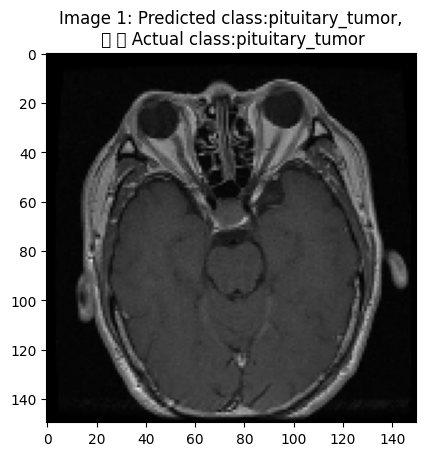

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


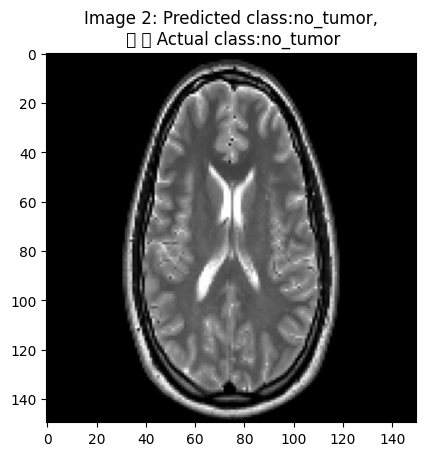

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


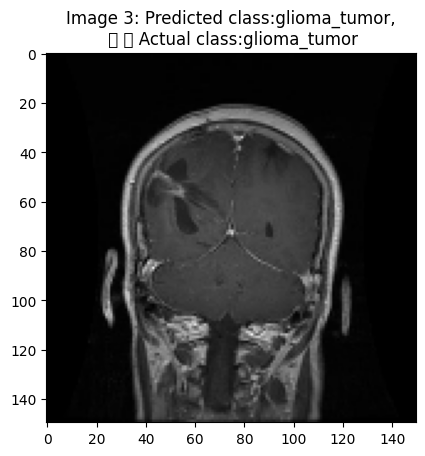

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


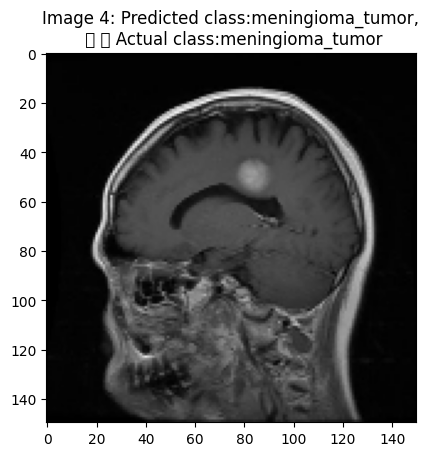

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


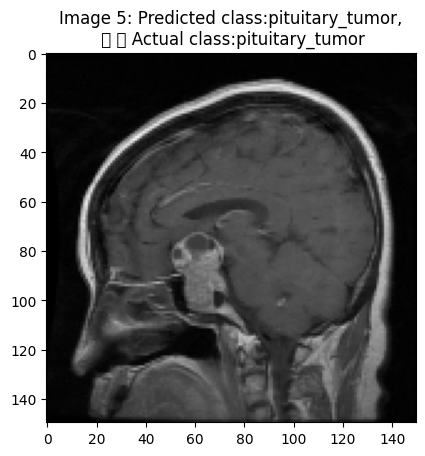

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


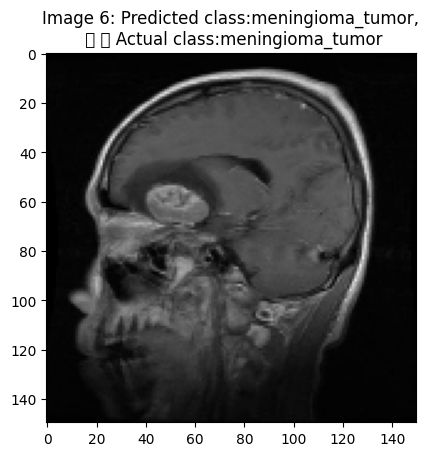

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


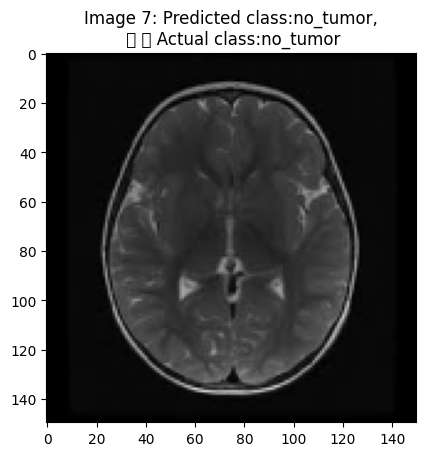

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


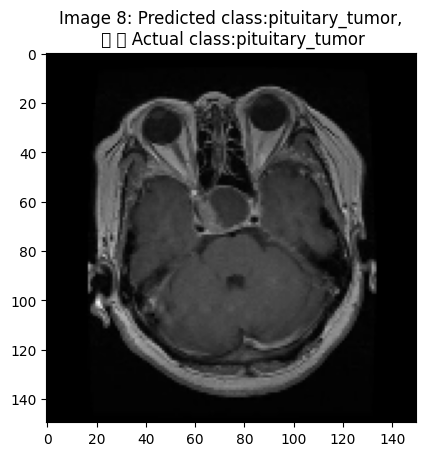

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


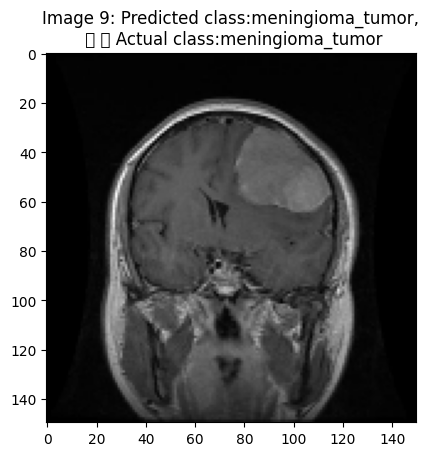

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


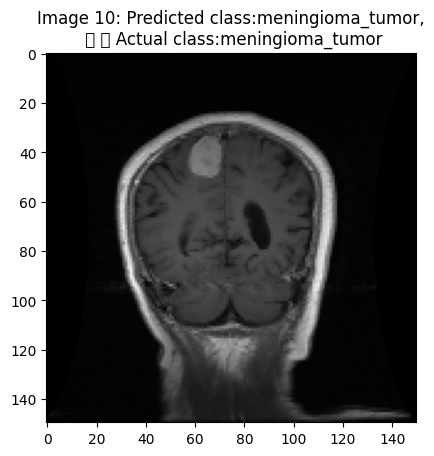

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


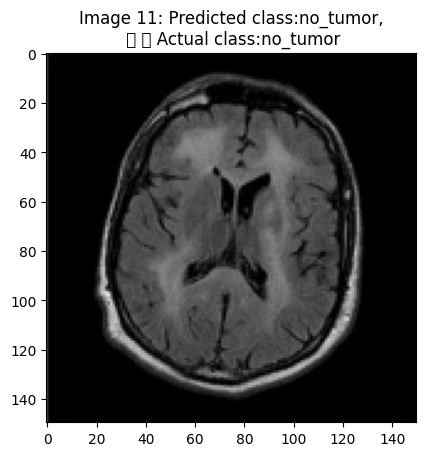

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


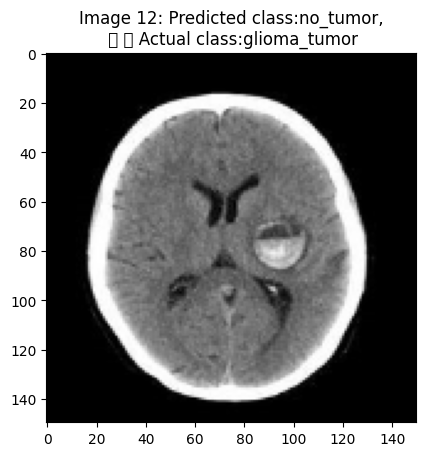

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


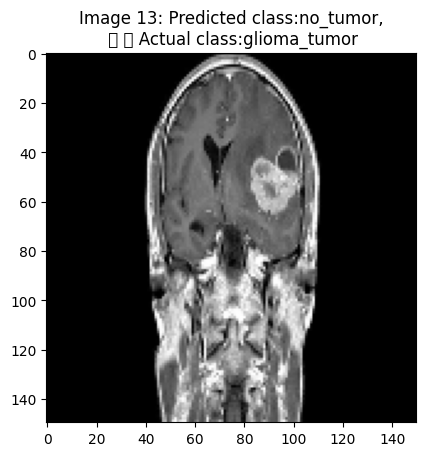

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


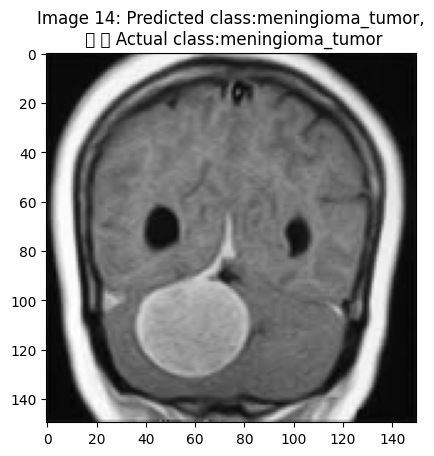

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


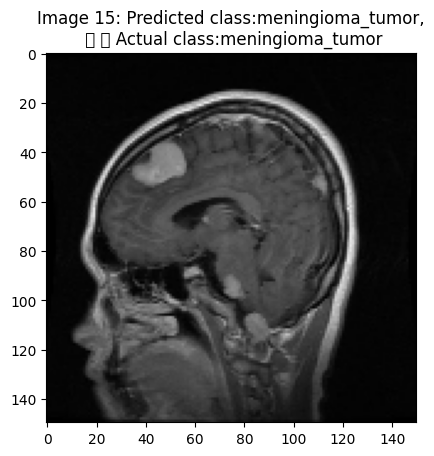

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


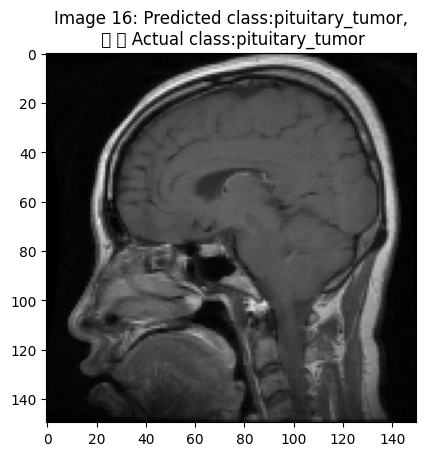

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


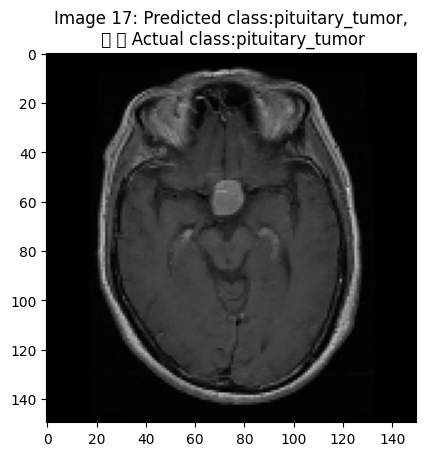

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


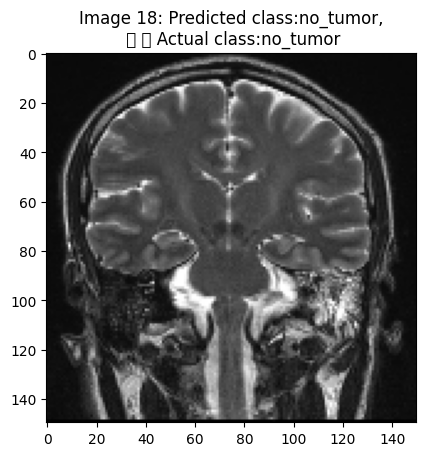

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


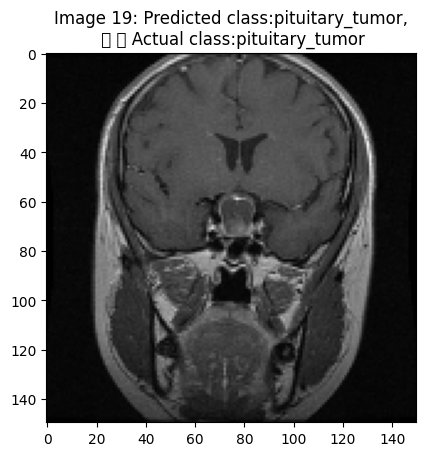

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The accuracy of prediction is: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


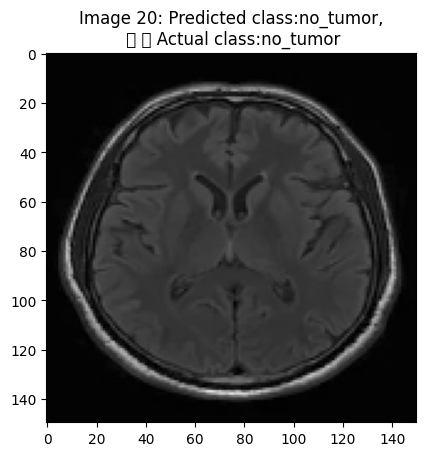

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The accuracy of prediction is: 100.00%


In [48]:


# Iterate through the first 20 images in the test data
for i in range(20):
    # Get the i-th test image
    test_image = X_test[i]
    
    # Reshape the image if necessary (depends on your model's input shape)
    # test_image = np.reshape(test_image, (1, height, width, channels)) 
    
    # Make prediction
    predicted_probabilities = model.predict(np.array([test_image]))
    
    # Get the predicted class label
    predicted_label = labels[np.argmax(predicted_probabilities)]
#     predicted_class = np.argmax(predicted_probabilities)
    
    # Get the actual class label
    actual_class = y_test[i]
    actual_class = labels[np.argmax(actual_class)]
    
    # Print the predicted and actual class labels
    plt.imshow(test_image)
    plt.title(f"Image {i+1}: Predicted class:{predicted_label},\n \t \t Actual class:{actual_class}")
    plt.show()
    accuracy = np.max(model.predict(img_array)) * 100
    print(f"The accuracy of prediction is: {accuracy:.2f}%")


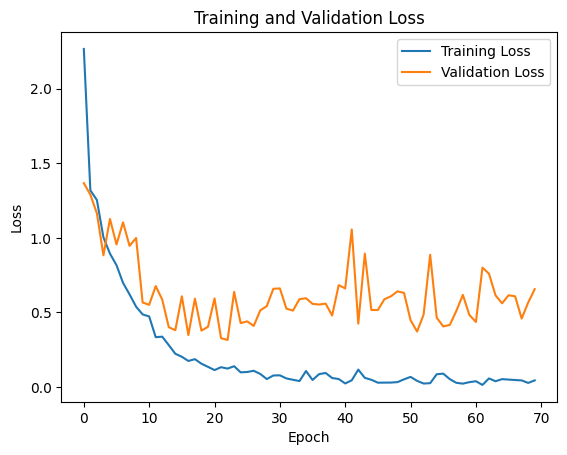

In [15]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

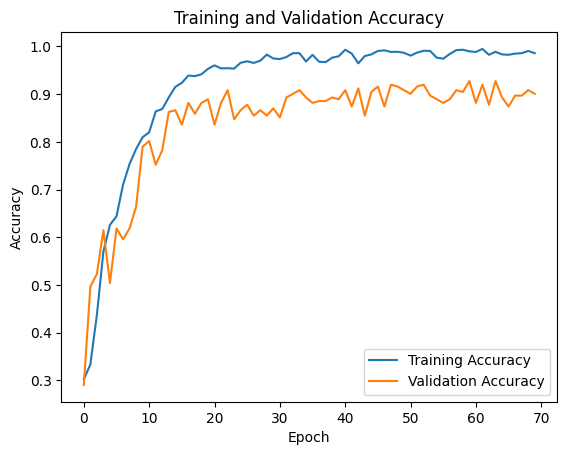

In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9008 - loss: 1.0401


W0000 00:00:1715336114.662256      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Validation Accuracy: 90.20%


In [18]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

12/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

W0000 00:00:1715336115.805570      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


W0000 00:00:1715336116.646957      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [19]:
# Confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

In [20]:
#accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 90.1990811638591


In [21]:
# Precision
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.9024465042414622


In [22]:
# Recall
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.9019908116385911


In [23]:
# F-score
f_score = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("F-Score:", f_score)

F-Score: 0.9010999210276078


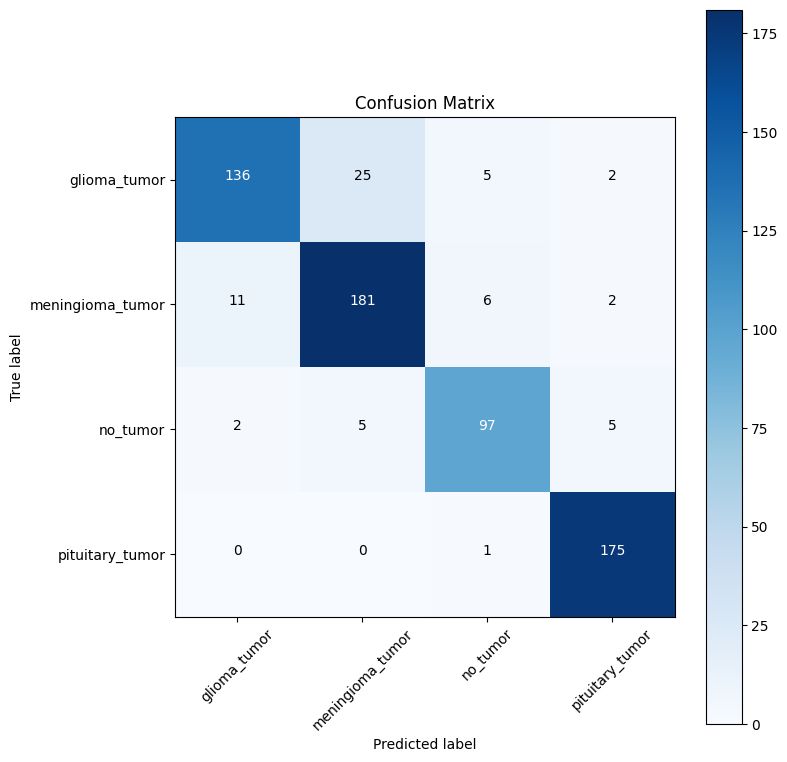

In [24]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [1]:
# Predict input image
img = cv2.imread('/home/davinci/Desktop/project/Dataset/archive/Testing/glioma_tumor/image(1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)


NameError: name 'cv2' is not defined

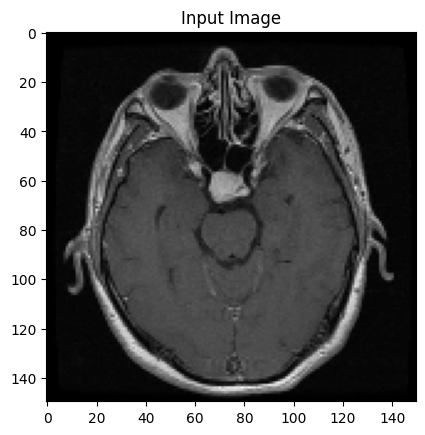

In [26]:
# Display input image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

In [27]:
# Predict class of input image
predicted_class = model.predict(img_array)[0]
predicted_label = labels[np.argmax(predicted_class)]
accuracy = np.max(model.predict(img_array)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [28]:
print(f"The predicted class of the input image is: {predicted_label}")
print(f"The accuracy of prediction is: {accuracy:.2f}%")

The predicted class of the input image is: meningioma_tumor
The accuracy of prediction is: 100.00%


SAVED MODEL

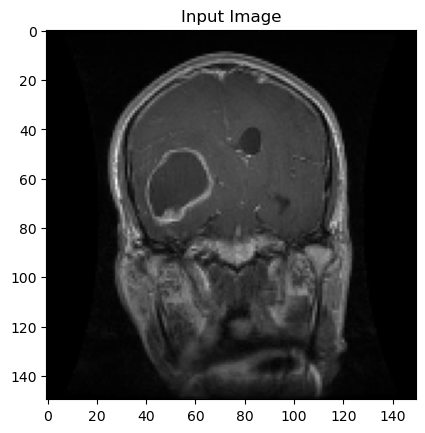

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
predicted class: [9.9997663e-01 1.2576802e-05 1.0711196e-05 9.3218899e-09]
predicted label: glioma_tumor
prediction Accuracy: 99.9976634979248


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def Predict():
    
    labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
    # Load the model
    model = tf.keras.models.load_model('finalyear.h5')
    
    # Load the image
    img = cv2.imread('/home/davinci/Desktop/project/Dataset/archive/Testing/glioma_tumor/image(70).jpg')
    img = cv2.resize(img,(150,150))
    img_array = np.array(img)
    img_array = img_array.reshape(1,150,150,3)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.show()
    
    predicted_class = model.predict(img_array)[0]
    predicted_label = labels[np.argmax(predicted_class)]
    accuracy = np.max(model.predict(img_array)) * 100
    print(f"predicted class: {predicted_class}")
    print(f"predicted label: {predicted_label}")
    print(f"prediction Accuracy: {accuracy}")
    
    
Predict()


CONVERTED MODEL

2024-05-29 11:00:23.933007: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 11:00:24.350642: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 11:00:25.964346: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 11:00:30.379650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


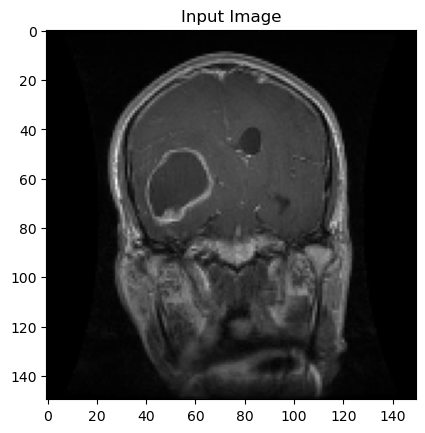

predicted class: [9.99976635e-01 1.25768365e-05 1.07112564e-05 9.32197874e-09]
predicted label: glioma_tumor
prediction Accuracy: 100.00%


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def Predict():
    labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    
    # Load the TFLite model and allocate tensors
    interpreter = tf.lite.Interpreter(model_path='finalyear.tflite')
    interpreter.allocate_tensors()
    
    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Load the image
    img = cv2.imread('/home/davinci/Desktop/project/Dataset/archive/Testing/glioma_tumor/image(70).jpg')
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img, dtype=np.float32)
    img_array = np.expand_dims(img_array, axis=0)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.show()
    
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], img_array)
    
    # Run inference
    interpreter.invoke()
    
    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])[0]
    
    predicted_label = labels[np.argmax(output_data)]
    accuracy = np.max(output_data) * 100
    print(f"predicted class: {output_data}")
    print(f"predicted label: {predicted_label}")
    print(f"prediction Accuracy: {accuracy:.2f}%")
    
Predict()
